In [1396]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1397]:
from sklearn.datasets import load_wine

In [1398]:
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')


In [1399]:
data_test.head()

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1


In [1400]:
data_train.head()


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


In [1401]:
#Уберем столбец RiskScore
#data_train = data_train.drop(columns='RiskScore')
data_train.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [1402]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [1403]:
#Подсчет процента пропусков в каждом признаке
def get_na_percentage(data_train):
    missing_values_percentage = data_train.isnull().mean()
    print("Процент пропусков в каждом признаке:")
    for column, percentage in missing_values_percentage.items():
        print(f"{column}: {percentage*100:.2f}%")

get_na_percentage(data_train)

Процент пропусков в каждом признаке:
ApplicationDate: 4.81%
Age: 4.81%
AnnualIncome: 4.81%
CreditScore: 9.36%
LoanAmount: 9.36%
LoanDuration: 4.81%
MaritalStatus: 4.81%
NumberOfDependents: 4.81%
HomeOwnershipStatus: 4.81%
MonthlyDebtPayments: 9.36%
CreditCardUtilizationRate: 4.81%
NumberOfOpenCreditLines: 4.81%
NumberOfCreditInquiries: 4.81%
DebtToIncomeRatio: 4.81%
BankruptcyHistory: 9.36%
LoanPurpose: 9.36%
PreviousLoanDefaults: 4.81%
PaymentHistory: 4.81%
LengthOfCreditHistory: 4.81%
SavingsAccountBalance: 4.81%
CheckingAccountBalance: 9.36%
TotalAssets: 9.36%
TotalLiabilities: 4.81%
MonthlyIncome: 4.81%
UtilityBillsPaymentHistory: 4.81%
JobTenure: 4.81%
EmploymentStatus: 4.81%
EducationLevel: 4.81%
Experience: 4.81%
NetWorth: 9.36%
BaseInterestRate: 9.36%
InterestRate: 4.81%
MonthlyLoanPayment: 4.81%
TotalDebtToIncomeRatio: 4.81%
LoanApproved: 4.81%
RiskScore: 4.81%


Окей, отсутствие данных в RiskScore в районе 5%, пренебрежем этими записями и удалим их из выборки

In [1404]:
data_train.dropna(subset=['RiskScore'], axis='rows', inplace=True)
get_na_percentage(data_train)

Процент пропусков в каждом признаке:
ApplicationDate: 0.00%
Age: 0.00%
AnnualIncome: 0.00%
CreditScore: 4.78%
LoanAmount: 4.78%
LoanDuration: 0.00%
MaritalStatus: 0.00%
NumberOfDependents: 0.00%
HomeOwnershipStatus: 0.00%
MonthlyDebtPayments: 4.78%
CreditCardUtilizationRate: 0.00%
NumberOfOpenCreditLines: 0.00%
NumberOfCreditInquiries: 0.00%
DebtToIncomeRatio: 0.00%
BankruptcyHistory: 4.78%
LoanPurpose: 4.78%
PreviousLoanDefaults: 0.00%
PaymentHistory: 0.00%
LengthOfCreditHistory: 0.00%
SavingsAccountBalance: 0.00%
CheckingAccountBalance: 4.78%
TotalAssets: 4.78%
TotalLiabilities: 0.00%
MonthlyIncome: 0.00%
UtilityBillsPaymentHistory: 0.00%
JobTenure: 0.00%
EmploymentStatus: 0.00%
EducationLevel: 0.00%
Experience: 0.00%
NetWorth: 4.78%
BaseInterestRate: 4.78%
InterestRate: 0.00%
MonthlyLoanPayment: 0.00%
TotalDebtToIncomeRatio: 0.00%
LoanApproved: 0.00%
RiskScore: 0.00%


Давайте посмотрим, какие признаки числовые, а какие - категориальные

In [1405]:
# Определение числовых и категориальных признаков
num_data = data_train.select_dtypes(include=['int64', 'float64'])
cat_data = data_train.select_dtypes(exclude=['int64', 'float64'])
print("Числовые признаки:")
print(num_data.columns)
print("\nКатегориальные признаки:")
print(cat_data.columns)

Числовые признаки:
Index(['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
       'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate',
       'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio',
       'LoanApproved', 'RiskScore'],
      dtype='object')

Категориальные признаки:
Index(['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus',
       'LoanPurpose', 'EmploymentStatus', 'EducationLevel'],
      dtype='object')


И числовые (e.g. BankruptcyHistory), и категориальные (e.g. LoanPurpose) имеют пропуски. Заполним пропуски в числовых признаках средним, а в категориальных - модой 

А еще удалим дубликаты

In [1406]:
print(f"До: {data_train.shape[0]}")
data_train = data_train.drop_duplicates()
print(f"После удаления дубликатов: {data_train.shape[0]}")

До: 10487
После удаления дубликатов: 10000


In [1407]:

for col in num_data.columns:
    mean_value = data_train[col].mean()
    data_train.fillna({col: mean_value}, inplace=True)

for col in cat_data.columns:
    mode_value = data_train[col].mode()[0] 
    data_train.fillna({col: mode_value}, inplace=True)
get_na_percentage(data_train)

print(data_train.shape)


Процент пропусков в каждом признаке:
ApplicationDate: 0.00%
Age: 0.00%
AnnualIncome: 0.00%
CreditScore: 0.00%
LoanAmount: 0.00%
LoanDuration: 0.00%
MaritalStatus: 0.00%
NumberOfDependents: 0.00%
HomeOwnershipStatus: 0.00%
MonthlyDebtPayments: 0.00%
CreditCardUtilizationRate: 0.00%
NumberOfOpenCreditLines: 0.00%
NumberOfCreditInquiries: 0.00%
DebtToIncomeRatio: 0.00%
BankruptcyHistory: 0.00%
LoanPurpose: 0.00%
PreviousLoanDefaults: 0.00%
PaymentHistory: 0.00%
LengthOfCreditHistory: 0.00%
SavingsAccountBalance: 0.00%
CheckingAccountBalance: 0.00%
TotalAssets: 0.00%
TotalLiabilities: 0.00%
MonthlyIncome: 0.00%
UtilityBillsPaymentHistory: 0.00%
JobTenure: 0.00%
EmploymentStatus: 0.00%
EducationLevel: 0.00%
Experience: 0.00%
NetWorth: 0.00%
BaseInterestRate: 0.00%
InterestRate: 0.00%
MonthlyLoanPayment: 0.00%
TotalDebtToIncomeRatio: 0.00%
LoanApproved: 0.00%
RiskScore: 0.00%
(10000, 36)


## А теперь к выбросам

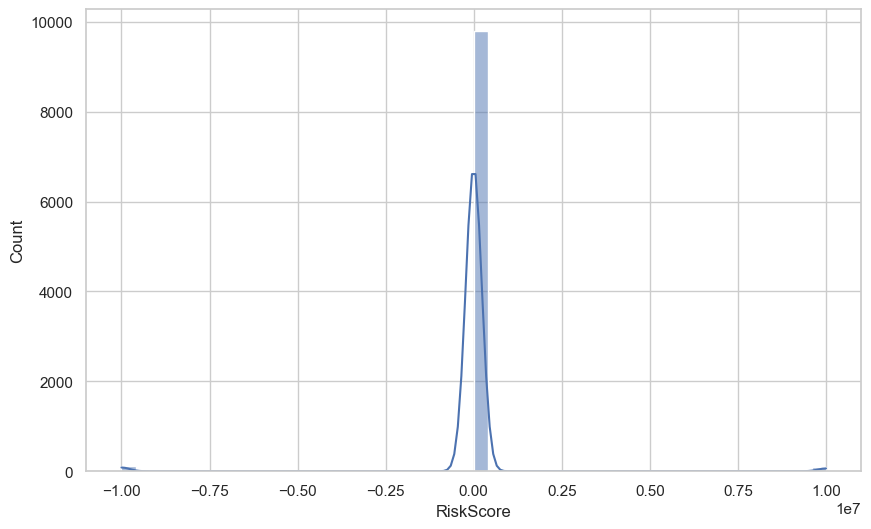

In [1408]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='RiskScore', bins=50, kde=True)
plt.show()

Заметим, что в пределах 0 - 2_500_000 первый bin (пятая часть от отрезка, 0-500000) большинство данных, остальное будем считать выбросами

91
121
10000


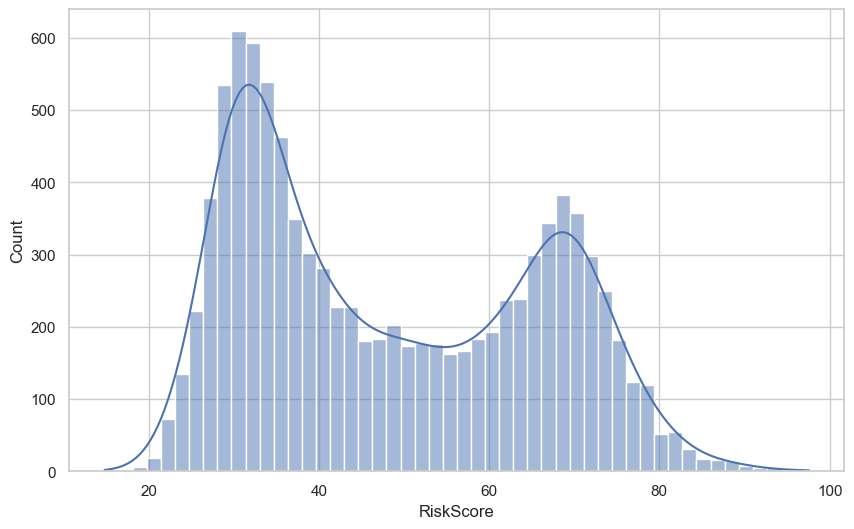

In [1409]:
print(len(data_train[data_train['RiskScore'] > 500000]))
print(len(data_train[data_train['RiskScore'] < 0]))
print(len(data_train))
data_train = data_train[(data_train['RiskScore'] > 0) & (data_train['RiskScore'] < 500000)]
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='RiskScore', bins=50, kde=True)
plt.show()

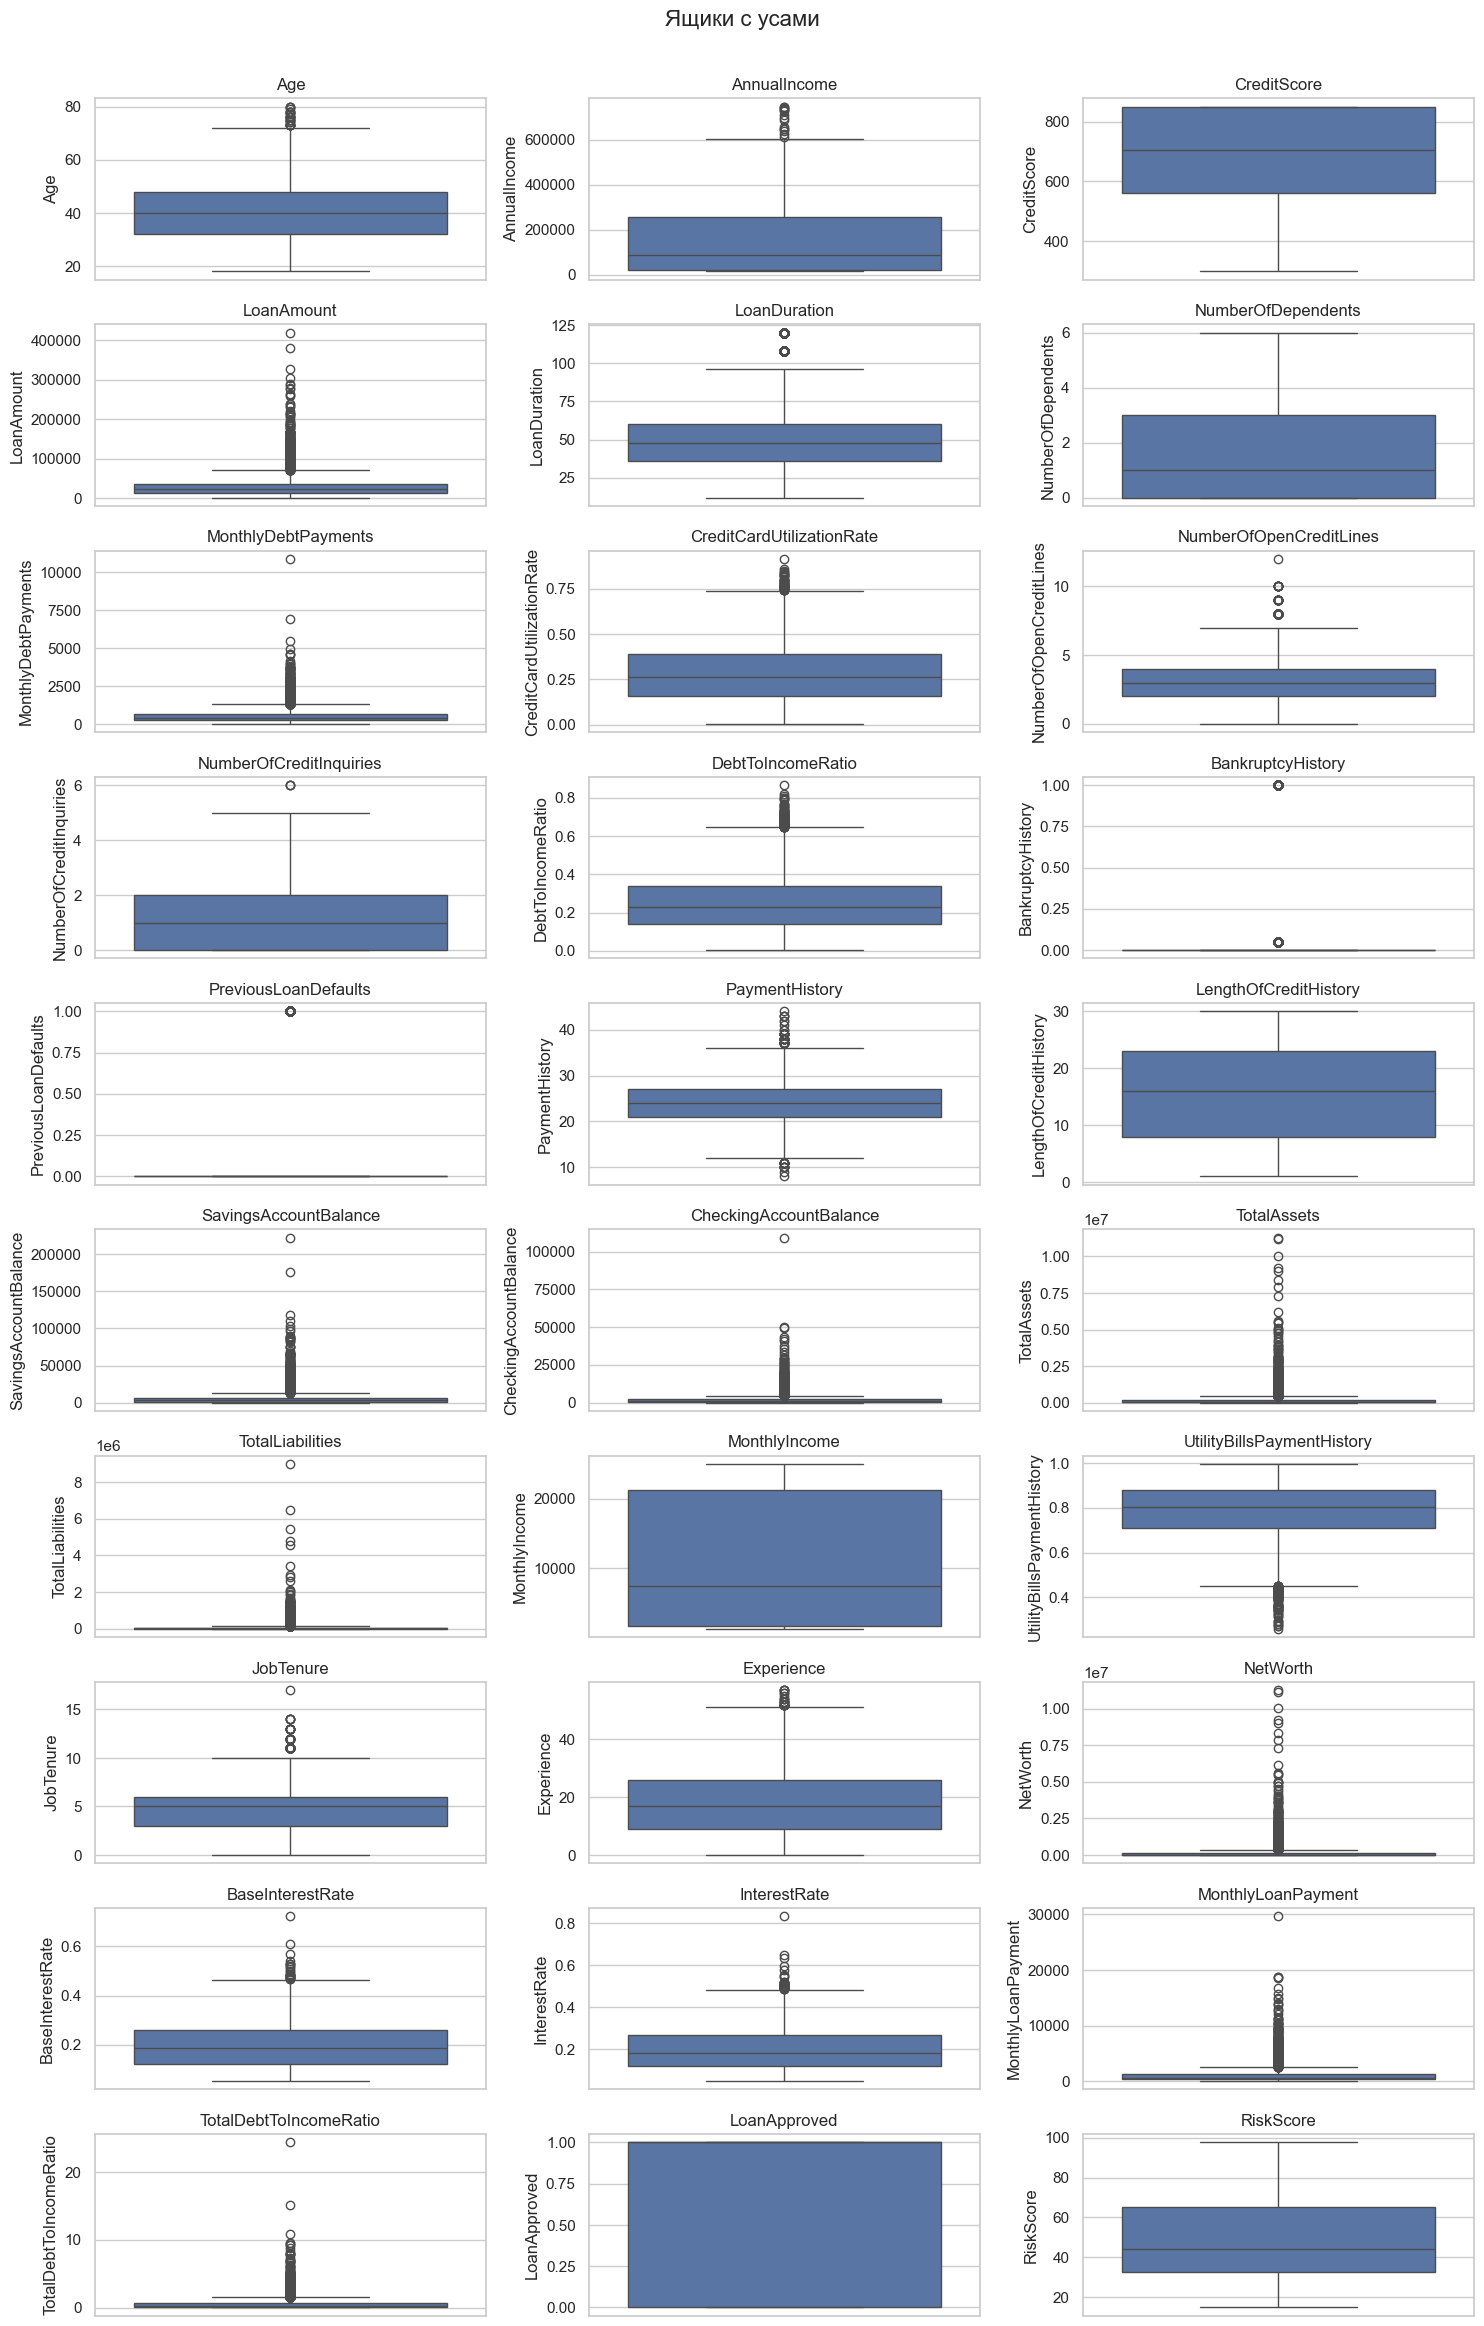

(9788, 36)


In [1410]:

def plot_boxplots(df, title):
    num_data = data_train.select_dtypes(include=['int64', 'float64'])
    plt.figure(figsize=(15, 25))
    for i, col in enumerate(num_data.columns):
        plt.subplot(len(num_data.columns) // 3 + 1, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

plot_boxplots(data_train, 'Ящики с усами')

print(data_train.shape)

In [1411]:
print(data_train.shape)
data_train = data_train[(data_train['RiskScore'] > 0) & (data_train['RiskScore'] < 500000)]
data_train = data_train[(data_train['LoanAmount'] < 100000)]
print(data_train.shape)

(9788, 36)
(9573, 36)


Также необходимо избавиться от мультиколлинеарности

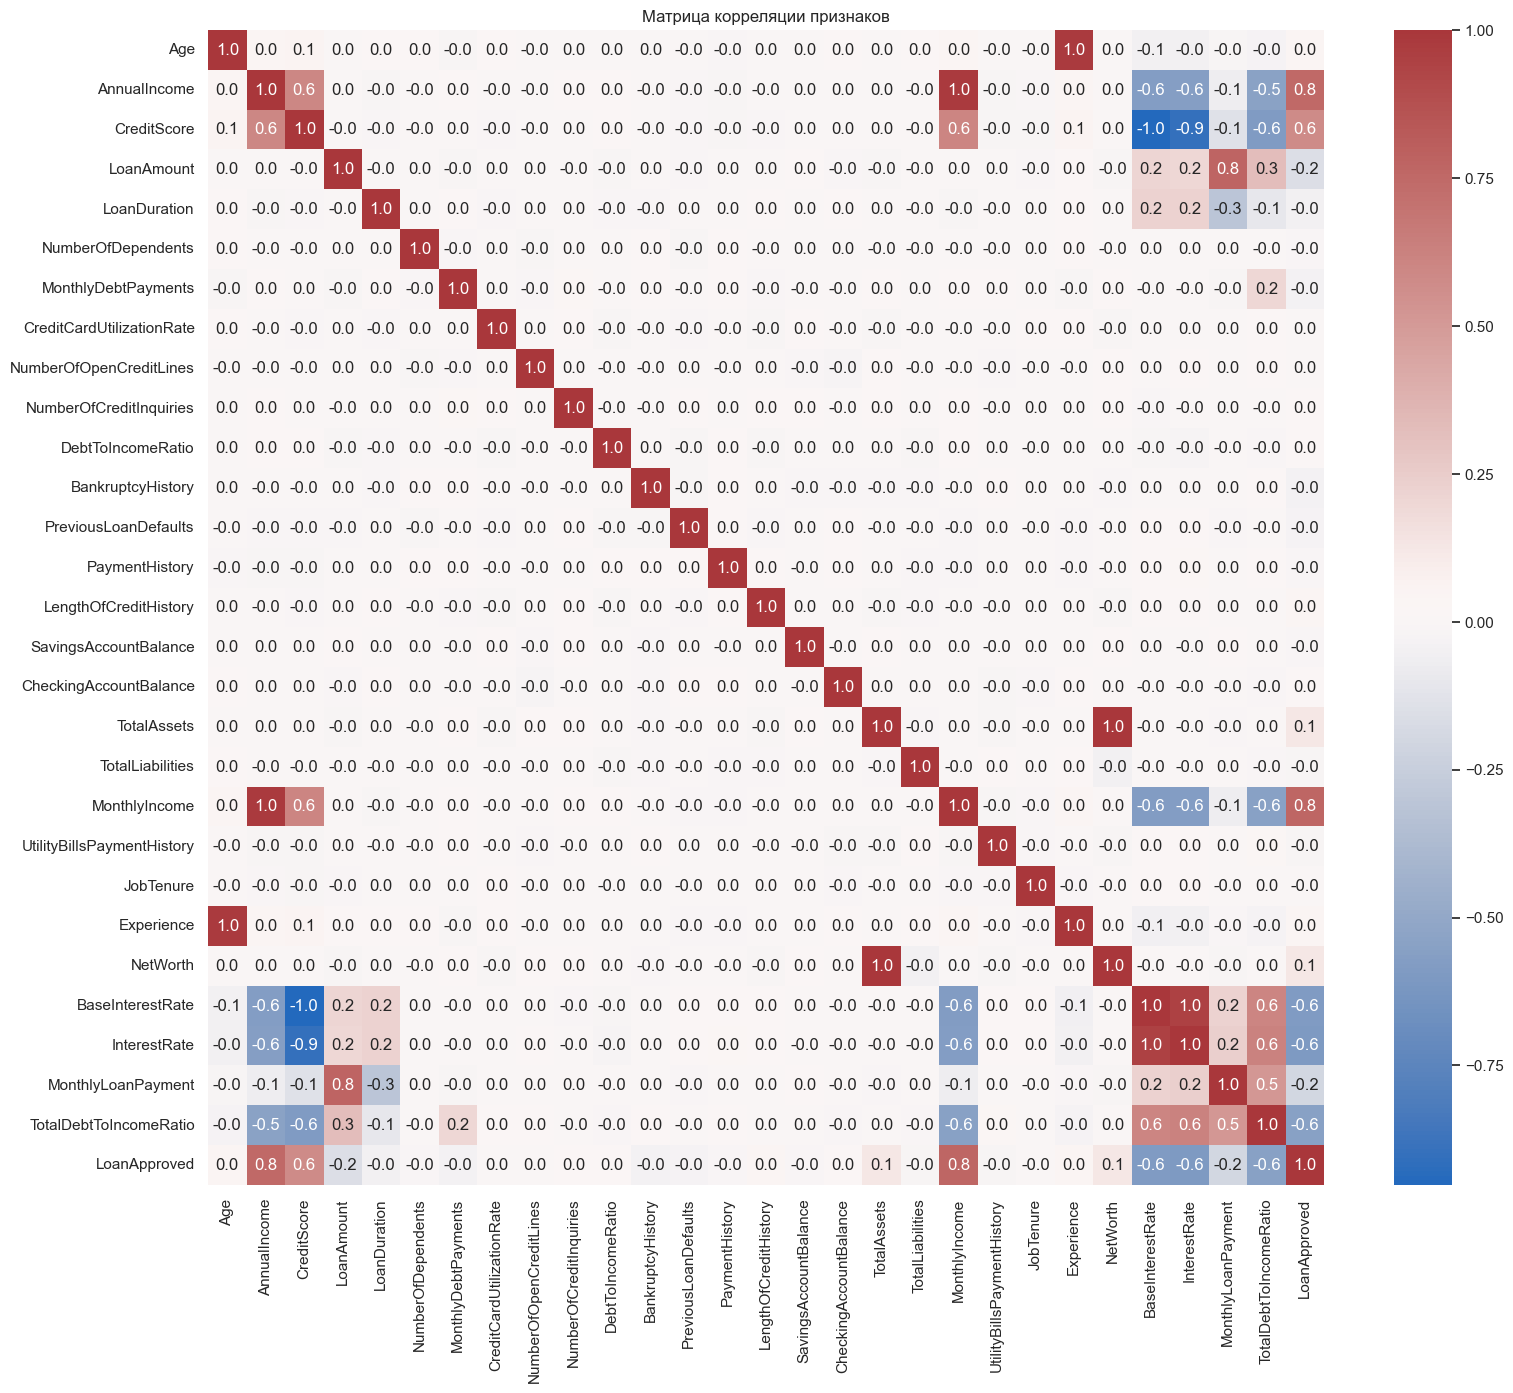

In [1412]:
# Вычисление корреляционной матрицы
data_notarg = data_train.drop(columns='RiskScore')
num_data_notarg = data_notarg.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_data_notarg.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='vlag')
plt.title('Матрица корреляции признаков')
plt.show()

Так, выведем пары коррелирующих признаков

In [1413]:
corr_matrix = data_train.select_dtypes(include=['int64', 'float64']).corr()
# Инициализация списка для хранения коррелирующих пар
corr_pairs = []

# Поиск коррелирующих пар признаков
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col_1 = corr_matrix.columns[i]
        col_2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= 0.75:
            corr_pairs.append((col_1, col_2, corr_value))

# Сортировка пар по значению корреляции
corr_pairs.sort(key=lambda x: x[2])

# Вывод результатов с корреляцией к RiskScore
print("Пары признаков и их корреляция с RiskScore:")
for pair in corr_pairs:
    print(pair)

Пары признаков и их корреляция с RiskScore:
('CreditScore', 'BaseInterestRate', np.float64(-0.9519141343634854))
('CreditScore', 'InterestRate', np.float64(-0.9041922263002026))
('LoanApproved', 'RiskScore', np.float64(-0.8759643422988255))
('MonthlyIncome', 'RiskScore', np.float64(-0.7709992637802978))
('CreditScore', 'RiskScore', np.float64(-0.7684432840757767))
('AnnualIncome', 'RiskScore', np.float64(-0.7587880017925834))
('AnnualIncome', 'LoanApproved', np.float64(0.7519125178640618))
('MonthlyIncome', 'LoanApproved', np.float64(0.7645415727931286))
('LoanAmount', 'MonthlyLoanPayment', np.float64(0.7733059559120077))
('BaseInterestRate', 'InterestRate', np.float64(0.9504825816157338))
('Age', 'Experience', np.float64(0.9827473469483666))
('AnnualIncome', 'MonthlyIncome', np.float64(0.9847462925131326))
('TotalAssets', 'NetWorth', np.float64(0.9945064724755688))


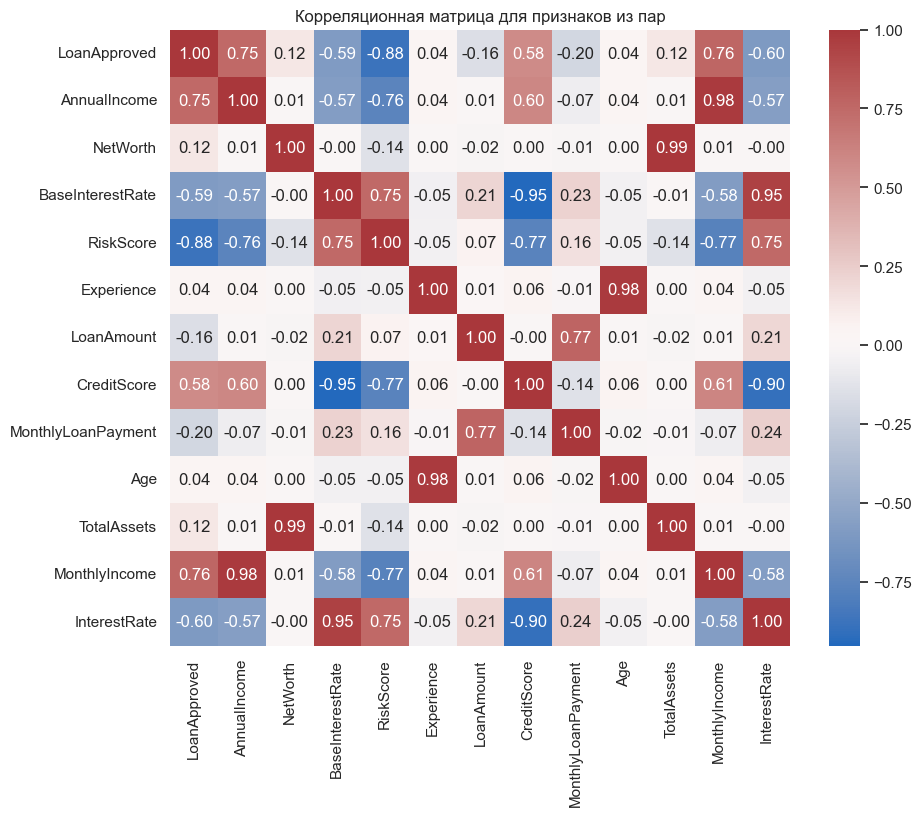

In [1414]:
# Собираем уникальные признаки из коррелирующих пар
features_in_pairs = set()
for col1, col2, _ in corr_pairs:
    features_in_pairs.add(col1)
    features_in_pairs.add(col2)

# Оставляем только эти признаки в датафрейме
selected_data = data_train[list(features_in_pairs)]

# Строим и выводим корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, fmt=".2f", cmap='vlag')
plt.title('Корреляционная матрица для признаков из пар')
plt.show()

Рассмотрим возраст и опыт - корреляция 0.98

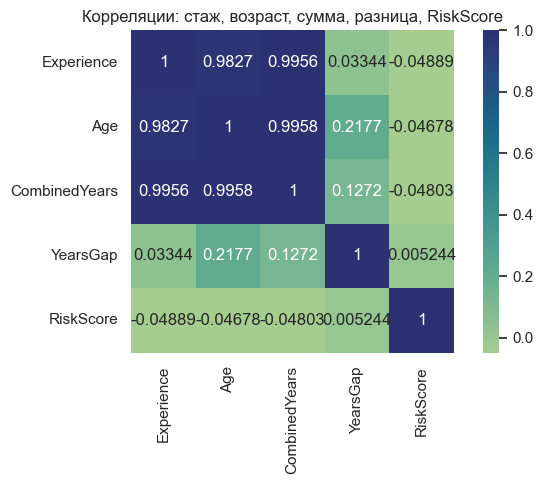

In [1415]:
# --- Корреляции: возраст, стаж, альтернативные признаки (без функций) ---
age_exp_alt = data_train[['Experience', 'Age', 'RiskScore']].copy()
age_exp_alt['YearsGap'] = age_exp_alt['Age'] - age_exp_alt['Experience']
age_exp_alt['CombinedYears'] = age_exp_alt['Age'] + age_exp_alt['Experience']

# Переставим порядок столбцов
cols = ['Experience', 'Age', 'CombinedYears', 'YearsGap', 'RiskScore']
corr_matrix_alt = age_exp_alt[cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix_alt, annot=True, fmt='.4g', cmap='crest', square=True)
plt.title('Корреляции: стаж, возраст, сумма, разница, RiskScore')
plt.tight_layout()
plt.show()

наибольшее влияние на RiskScore оказывает именно трудовой стаж. Поэтому для дальнейшей работы оставим только этот показатель. 

In [1416]:
data_train = data_train.drop('Age', axis=1, errors='ignore')
data_test.drop(['Age'], axis=1, inplace=True, errors='ignore')

'AnnualIncome', 'MonthlyIncome' - один следует из другого. Убираем AnuualIncome. 
'TotalAssets', 'NetWorth' - 0.99 и одинаковое влияние на RiskScore. Удалим последний

In [1417]:
data_train = data_train.drop('AnnualIncome', axis=1, errors='ignore')
data_test.drop(['AnnualIncome'], axis=1, inplace=True, errors='ignore')

# Удаляем столбец NetWorth из обучающей и тестовой выборок, если он есть
data_train.drop(['NetWorth'], axis=1, inplace=True, errors='ignore')
data_test.drop(['NetWorth'], axis=1, inplace=True, errors='ignore')

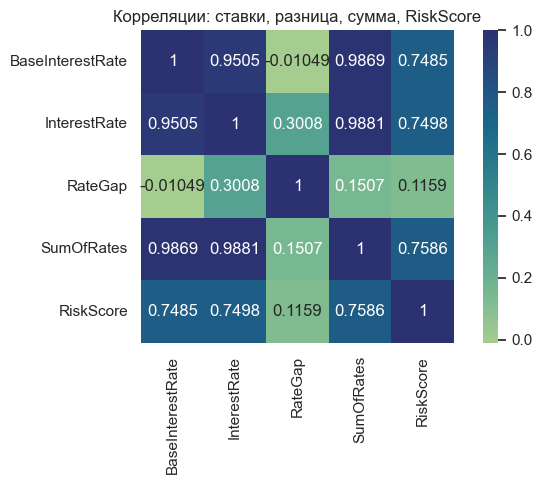

In [1418]:
rates_df = data_train[['BaseInterestRate', 'InterestRate', 'RiskScore']].copy()
rates_df['RateGap'] = rates_df['InterestRate'] - rates_df['BaseInterestRate']
rates_df['SumOfRates'] = rates_df['InterestRate'] + rates_df['BaseInterestRate']

# Переставим порядок столбцов для наглядности
cols = ['BaseInterestRate', 'InterestRate', 'RateGap', 'SumOfRates', 'RiskScore']
corr_rates = rates_df[cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_rates, annot=True, fmt='.4g', cmap='crest', square=True)
plt.title('Корреляции: ставки, разница, сумма, RiskScore')
plt.tight_layout()
plt.show()

Лучше всего себя показала сумма признаков (в отношении RiskScore)

In [1419]:
# Создаём новый признак как сумму двух ставок
data_train['SumOfRates'] = data_train['InterestRate'] + data_train['BaseInterestRate']
data_test['SumOfRates'] = data_test['InterestRate'] + data_test['BaseInterestRate']

# Удаляем исходные столбцы ставок, чтобы оставить только новый признак
data_train.drop(['InterestRate', 'BaseInterestRate'], axis=1, inplace=True, errors='ignore')
data_test.drop(['InterestRate', 'BaseInterestRate'], axis=1, inplace=True, errors='ignore')

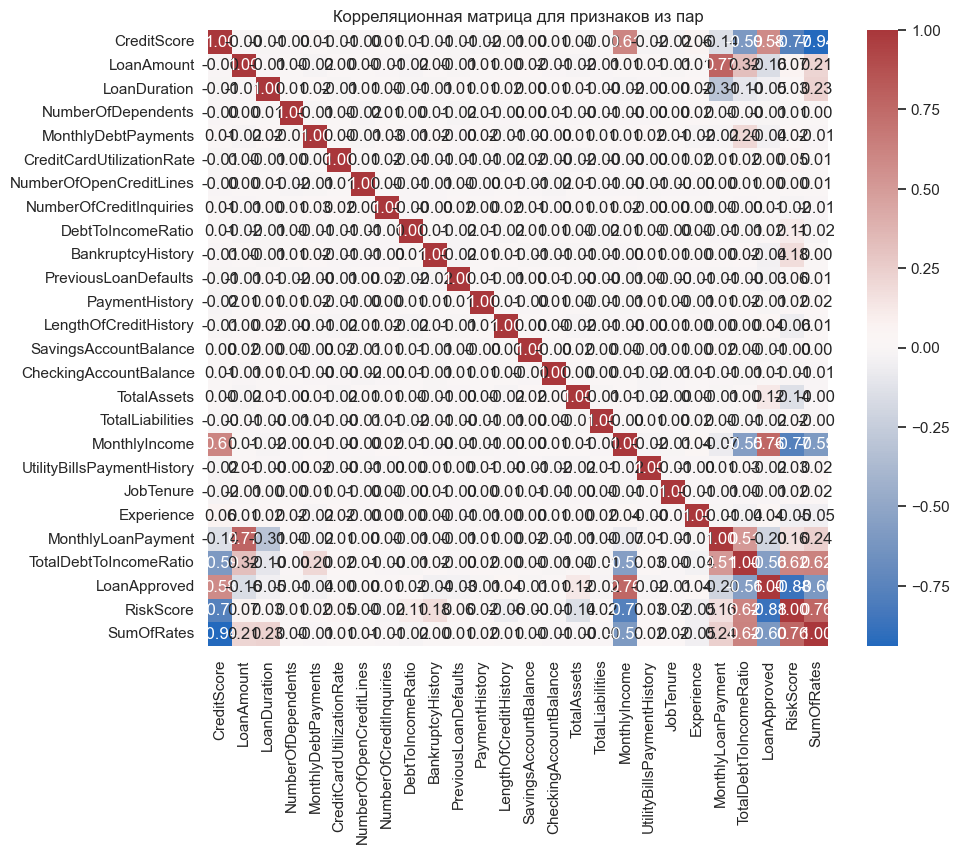

In [1420]:
selected_data = data_train.select_dtypes(include=['int64', 'float64'])

# Строим и выводим корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, fmt=".2f", cmap='vlag')
plt.title('Корреляционная матрица для признаков из пар')
plt.show()

In [1421]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9573 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             9573 non-null   object 
 1   CreditScore                 9573 non-null   float64
 2   LoanAmount                  9573 non-null   float64
 3   LoanDuration                9573 non-null   float64
 4   MaritalStatus               9573 non-null   object 
 5   NumberOfDependents          9573 non-null   float64
 6   HomeOwnershipStatus         9573 non-null   object 
 7   MonthlyDebtPayments         9573 non-null   float64
 8   CreditCardUtilizationRate   9573 non-null   float64
 9   NumberOfOpenCreditLines     9573 non-null   float64
 10  NumberOfCreditInquiries     9573 non-null   float64
 11  DebtToIncomeRatio           9573 non-null   float64
 12  BankruptcyHistory           9573 non-null   float64
 13  LoanPurpose                 9573 non-n

### Обработка категориальных признаков

In [1422]:
def transform_application_date(df):
    tmp = df.copy()
    tmp['ApplicationDate'] = pd.to_datetime(tmp['ApplicationDate'])
    tmp['ApplicationYear'] = tmp['ApplicationDate'].dt.year
    tmp['ApplicationMonth'] = tmp['ApplicationDate'].dt.month
    tmp['ApplicationDay'] = tmp['ApplicationDate'].dt.day

    tmp = tmp.drop(columns=['ApplicationDate'])
    return tmp

train_df = transform_application_date(data_train)
test_df = transform_application_date(data_test)

print(train_df['ApplicationYear'][0])
print(train_df['ApplicationMonth'][0])
print(train_df['ApplicationDay'][0])

print(train_df.info())

2010
6
26
<class 'pandas.core.frame.DataFrame'>
Index: 9573 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CreditScore                 9573 non-null   float64
 1   LoanAmount                  9573 non-null   float64
 2   LoanDuration                9573 non-null   float64
 3   MaritalStatus               9573 non-null   object 
 4   NumberOfDependents          9573 non-null   float64
 5   HomeOwnershipStatus         9573 non-null   object 
 6   MonthlyDebtPayments         9573 non-null   float64
 7   CreditCardUtilizationRate   9573 non-null   float64
 8   NumberOfOpenCreditLines     9573 non-null   float64
 9   NumberOfCreditInquiries     9573 non-null   float64
 10  DebtToIncomeRatio           9573 non-null   float64
 11  BankruptcyHistory           9573 non-null   float64
 12  LoanPurpose                 9573 non-null   object 
 13  PreviousLoanDefaults        

In [1423]:

categorial_features = data_train.select_dtypes(include=['object']).columns
print(categorial_features)
for i in range(len(categorial_features)):
    if (categorial_features[i] == 'ApplicationDate'):
        categorial_features = categorial_features.delete(i)
        break

train_df = pd.get_dummies(train_df, columns=categorial_features, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorial_features, drop_first=True)


 


Index(['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus',
       'LoanPurpose', 'EmploymentStatus', 'EducationLevel'],
      dtype='object')


In [1424]:
test_df.shape

(5000, 45)

In [1425]:
train_df.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 9573 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CreditScore                     9573 non-null   float64
 1   LoanAmount                      9573 non-null   float64
 2   LoanDuration                    9573 non-null   float64
 3   NumberOfDependents              9573 non-null   float64
 4   MonthlyDebtPayments             9573 non-null   float64
 5   CreditCardUtilizationRate       9573 non-null   float64
 6   NumberOfOpenCreditLines         9573 non-null   float64
 7   NumberOfCreditInquiries         9573 non-null   float64
 8   DebtToIncomeRatio               9573 non-null   float64
 9   BankruptcyHistory               9573 non-null   float64
 10  PreviousLoanDefaults            9573 non-null   float64
 11  PaymentHistory                  9573 non-null   float64
 12  LengthOfCreditHistory           9573 no

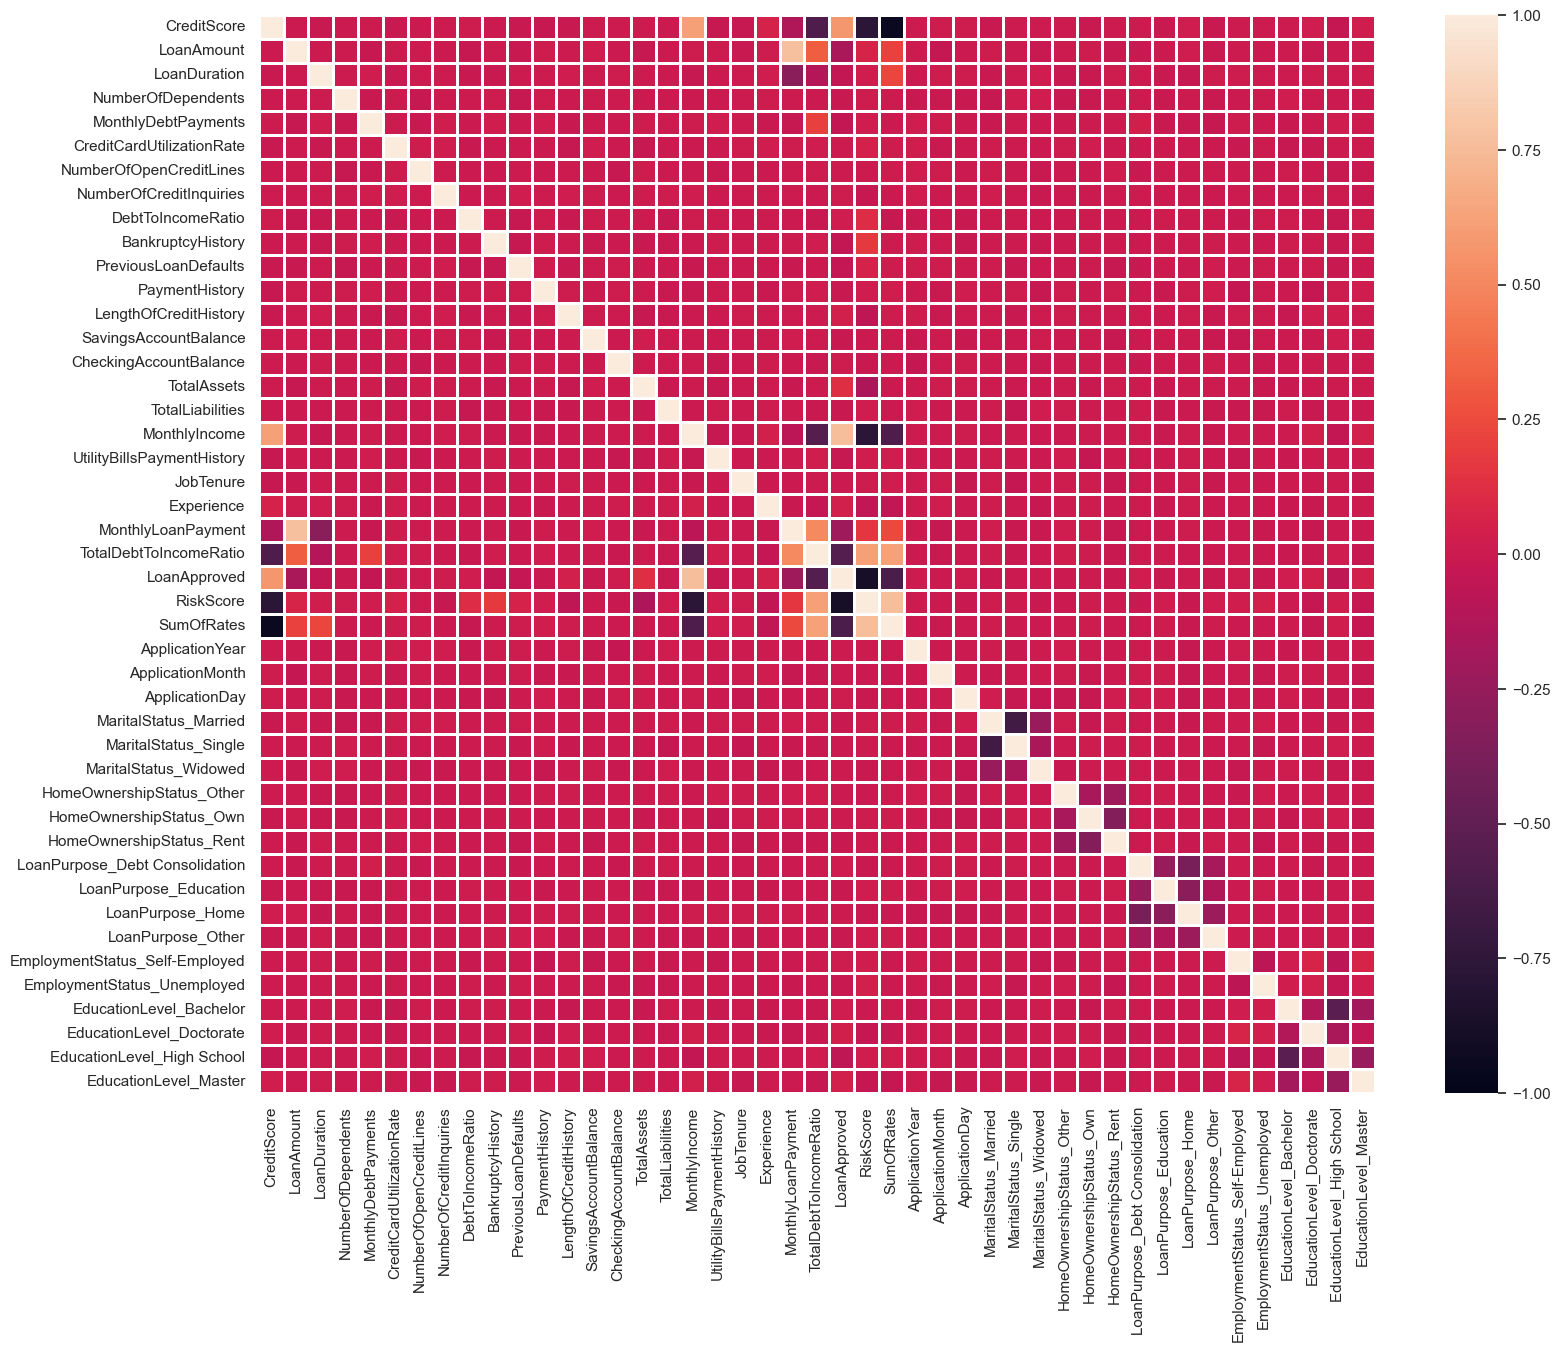

In [1426]:
corr_matrix = train_df.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix,
            # annot=True,
            fmt=".2f",
            vmin=-1,
            vmax=1,
            linewidths=1)
plt.show()
     


Используем Лассо для искоренения остатков мультиколлинеарности

In [1427]:
train_df.dropna(subset=['MonthlyIncome', 'SumOfRates'], axis='rows', inplace=True)
test_df.dropna(subset=['MonthlyIncome', 'SumOfRates'], axis='rows', inplace=True)

pr_train_df = train_df.copy()
pr_test_df = test_df.copy()

pr_test_df.shape
pr_train_df.shape

(9573, 45)

In [1428]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X = train_df.drop(columns=['RiskScore'])
y = train_df['RiskScore']

# Разделим на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

skmodel = Lasso(alpha=0.3)
skmodel.fit(X_train, y_train)
y_pred = skmodel.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Коэффициенты модели: {skmodel.coef_}")

coefs = skmodel.coef_
feature_names = X.columns
unimportant_features = feature_names[coefs == 0]
pr_train_df = pr_train_df.drop(columns=unimportant_features)
pr_test_df = pr_test_df.drop(columns=unimportant_features)
pr_train_df.info()
pr_test_df.info()

MSE: 30.64347173416327
Коэффициенты модели: [-3.89021776e-02 -1.51698973e-05  5.29960671e-03  0.00000000e+00
  1.80231126e-05  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.30365639e-01  5.98900687e+00  0.00000000e+00  0.00000000e+00
 -9.59795042e-02  1.55699101e-06  1.39555291e-05 -3.18462745e-06
  9.32760915e-07 -3.16211247e-04  0.00000000e+00  0.00000000e+00
  2.12630380e-03  8.12994974e-05  2.65820801e-01 -1.62084448e+01
  0.00000000e+00  6.23546024e-03 -8.72447992e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
<class 'pandas.core.frame.DataFrame'>
Index: 9573 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CreditScore             957

In [1429]:
from sklearn.preprocessing import StandardScaler


features_to_log = ['LoanAmount', 'MonthlyDebtPayments', 'DebtToIncomeRatio',
                   'TotalAssets','TotalLiabilities', 'MonthlyLoanPayment',
                   'TotalDebtToIncomeRatio']
features_to_normalize = ['CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
                         'DebtToIncomeRatio',
                         'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
                         'MonthlyLoanPayment',
                         'TotalDebtToIncomeRatio', 'ApplicationYear']

for feature in features_to_log:
    pr_train_df[feature] = np.log(pr_train_df[feature].replace(0, 1e-9))
    pr_test_df[feature] = np.log(pr_test_df[feature].replace(0, 1e-9))

scaler = StandardScaler()

for feature in features_to_normalize:
    pr_train_df[[feature]] = scaler.fit_transform(pr_train_df[[feature]])
    pr_test_df[[feature]] = scaler.fit_transform(pr_test_df[[feature]])



In [1430]:
pr_train_df.shape

(9573, 19)

In [1431]:
pr_test_df.shape

(5000, 19)

In [1432]:
class MinMaxScaler:

  def __init__(self):
    self.mn = 0
    self.mx = 1

  def fit(self, values : np.ndarray):
    self.mn = np.min(values, axis=0)
    self.mx = np.max(values, axis=0)

  def transform(self, values : np.ndarray):
    return (values - self.mn) / (self.mx - self.mn)

  def fit_transform(self, values : np.ndarray):
    self.fit(values)
    return self.transform(values)

In [1433]:
class ZScoreScaler:

  def __init__(self):
    self.mean = 0
    self.std = 1

  def fit(self, values : np.ndarray):
    self.mean = np.mean(values, axis=0)
    self.std = np.std(values, axis=0, ddof=0)

  def transform(self, values : np.ndarray):
    return (values - self.mean) / (self.std)

  def fit_transform(self, values : np.ndarray):
    self.fit(values)
    return self.transform(values)

In [1434]:
scaler = MinMaxScaler()
scaler.fit_transform(pr_train_df.values)

array([[0.45272727, 0.61409288, 0.44444444, ..., 0.62031982, 0.75609756,
        0.45454545],
       [1.        , 0.59852869, 0.22222222, ..., 0.16499526, 0.41463415,
        0.72727273],
       [1.        , 0.78998827, 0.22222222, ..., 0.23740546, 0.87804878,
        0.        ],
       ...,
       [1.        , 0.82056488, 0.66666667, ..., 0.3487158 , 0.75609756,
        0.27272727],
       [0.68767876, 0.73363959, 0.11111111, ..., 0.22566033, 0.75609756,
        0.90909091],
       [0.63454545, 0.58135193, 0.        , ..., 0.4986096 , 0.53658537,
        1.        ]], shape=(9573, 19))

In [1435]:

import sklearn

scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit_transform(pr_train_df.values)

array([[0.45272727, 0.61409288, 0.44444444, ..., 0.62031982, 0.75609756,
        0.45454545],
       [1.        , 0.59852869, 0.22222222, ..., 0.16499526, 0.41463415,
        0.72727273],
       [1.        , 0.78998827, 0.22222222, ..., 0.23740546, 0.87804878,
        0.        ],
       ...,
       [1.        , 0.82056488, 0.66666667, ..., 0.3487158 , 0.75609756,
        0.27272727],
       [0.68767876, 0.73363959, 0.11111111, ..., 0.22566033, 0.75609756,
        0.90909091],
       [0.63454545, 0.58135193, 0.        , ..., 0.4986096 , 0.53658537,
        1.        ]], shape=(9573, 19))

In [1436]:
scaler = ZScoreScaler()
scaler.fit_transform(pr_train_df.values)

array([[-0.753821  , -0.28680473,  0.26971981, ...,  1.03902467,
         0.93765012, -0.14086532],
       [ 1.00677579, -0.38398408, -0.71054889, ..., -1.1411299 ,
        -0.2443076 ,  0.72633964],
       [ 1.00677579,  0.81144649, -0.71054889, ..., -0.79442021,
         1.35977787, -1.58620692],
       ...,
       [ 1.00677579,  1.00235998,  1.24998852, ..., -0.26145149,
         0.93765012, -0.71900196],
       [ 0.0020267 ,  0.45961804, -1.20068325, ..., -0.85065745,
         0.93765012,  1.30447628],
       [-0.16890513, -0.49123186, -1.6908176 , ...,  0.45625995,
         0.17782016,  1.5935446 ]], shape=(9573, 19))

In [1437]:


scaler = sklearn.preprocessing.StandardScaler()
scaler.fit_transform(pr_train_df.values)
     


array([[-0.753821  , -0.28680473,  0.26971981, ...,  1.03902467,
         0.93765012, -0.14086532],
       [ 1.00677579, -0.38398408, -0.71054889, ..., -1.1411299 ,
        -0.2443076 ,  0.72633964],
       [ 1.00677579,  0.81144649, -0.71054889, ..., -0.79442021,
         1.35977787, -1.58620692],
       ...,
       [ 1.00677579,  1.00235998,  1.24998852, ..., -0.26145149,
         0.93765012, -0.71900196],
       [ 0.0020267 ,  0.45961804, -1.20068325, ..., -0.85065745,
         0.93765012,  1.30447628],
       [-0.16890513, -0.49123186, -1.6908176 , ...,  0.45625995,
         0.17782016,  1.5935446 ]], shape=(9573, 19))

In [1438]:
def mean_squared_error(true_vector, pred_vector):
    loss = (true_vector - pred_vector) ** 2
    return np.mean(loss)

def mean_absolute_error(true_vector, pred_vector):
    loss = np.abs(true_vector - pred_vector)
    return np.mean(loss)

def mean_absolute_percentage_error(true_vector, pred_vector):
    epsilon = np.finfo(np.float64).eps
    loss = np.abs((true_vector - pred_vector) / (true_vector + epsilon))
    return np.mean(loss) * 100

def r2_score(true_vector, pred_vector):
    mean_true = np.mean(true_vector)
    numerator = np.sum((true_vector - pred_vector) ** 2)
    denominator = np.sum((true_vector - mean_true) ** 2)
    return 1 - (numerator / denominator)

In [1439]:
class LinearRegression:

  def fit(self, features, target):
    feat = self._intercept(features)
    target = target.reshape((feat.shape[0], 1))
    t_feat = np.transpose(feat)
    sym = np.matmul(t_feat, feat)
    inv = np.linalg.inv(sym)
    self.weights = np.matmul(np.matmul(inv, t_feat), target)

  def predict(self, features):
    feat = self._intercept(features)
    return np.matmul(feat, self.weights).reshape(-1)

  @staticmethod
  def _intercept(featutes):
    col = np.ones(shape=(featutes.shape[0], 1))
    return np.hstack((col, featutes))
     


In [1440]:

import time
from typing import Literal


class GDLinearRegression(LinearRegression):

  def __init__(self,
               learn_c = 0.01,
               learn_pow = 0.25,
               iters = 1000,
               regularization: Literal['l1', 'l2', 'elasticNet', None] = None,
               reg_c = 0.0001,
               net_l1_ratio = 0.15,
               random_state = round(time.time())):

    self.learn_c = learn_c
    self.learn_pow = learn_pow
    self.iters = iters
    self.regularization = regularization
    self.reg_c = reg_c
    self.net_l1_ratio = net_l1_ratio
    self.rng = np.random.default_rng(seed=random_state)
    np.random.seed(random_state)

  def fit(self, features, target):
    feat = self._intercept(features)
    target = target.reshape((feat.shape[0], 1))
    iter = 0
    feat_cnt = feat.shape[1]
    w0 = np.zeros(shape=(feat_cnt, 1))
    w1 = self.rng.uniform(low=-1, high=1, size=feat_cnt).reshape((feat_cnt, 1))

    while iter < self.iters:
      iter += 1
      w0 = w1
      reg_grad = self._get_reg_grad(w0)
      c = self._get_learning_rate(iter)
      grad = self._get_gradient(w0, feat, target)
      
      w1 = w0 - c * grad - reg_grad

    self.weights = w1

  def _get_reg_grad(self, w):
    if(self.regularization == 'l1'):
      return self.reg_c * np.sign(w)
    elif(self.regularization == 'l2'):
      return self.reg_c * w
    elif(self.regularization == 'elasticNet'):
      return self.reg_c * (self.net_l1_ratio * np.sign(w) + (1 - self.net_l1_ratio) * w)
    else:
      return 0
  def _get_learning_rate(self, k):
    return self.learn_c / (k ** self.learn_pow)

  def _get_gradient(self, w, feat, target):
    pred = np.matmul(feat, w)
    return 2 / feat.shape[0] * feat.transpose().dot(pred - target)


In [1441]:
class SGDLinearRegression(GDLinearRegression):

  def __init__(self,
               learn_c = 0.1,
               learn_pow = 0.1,
               iters = 1000,
               regularization: Literal['l1', 'l2', 'elasticNet', None] = None,
               reg_coef = 0.0001,
               net_l1_ratio = 0.15,
               random_state = None):
    super().__init__(learn_c, learn_pow, iters, regularization, reg_coef, net_l1_ratio, random_state)

  def _get_gradient(self, w, feat, target):
    chosen_row = np.random.randint(0, feat.shape[0])
    pred = np.dot(feat[chosen_row], w)
    return 2 / feat.shape[0] * feat[chosen_row].reshape(-1, 1) * (pred - target[chosen_row])
     


In [1442]:
def k_fold_score(model, x, y, fold_count, metrics=[mean_squared_error], random_state=None):
  indexes = np.arange(len(y))
  np.random.seed(random_state)
  np.random.shuffle(indexes)
  folds = np.array_split(indexes, fold_count)
  scores = np.ndarray((fold_count, len(metrics)))
  for i in range(fold_count):
    train_x = np.delete(x, folds[i], axis=0)
    train_y = np.delete(y, folds[i], axis=0)


    test_x = x[folds[i]]
    test_y = y[folds[i]]

    model.fit(train_x, train_y)
    pred = model.predict(test_x)

    for j in range(len(metrics)):
      scores[i][j] = metrics[j](test_y, pred)

  return scores.mean(axis=0)

def get_leave_one_out_score(model, x, y, metrics=[mean_squared_error], random_state=None):
  return k_fold_score(model, x, y, len(y), metrics=metrics, random_state=random_state)
     


In [1443]:


x = pr_train_df.drop(columns='RiskScore').values
y = pr_train_df['RiskScore'].values
scaler = sklearn.preprocessing.StandardScaler()
x = scaler.fit_transform(x)
     


In [1444]:
def display_model_comparison(models, titles, fold_cnt=5, metrics=[mean_squared_error, r2_score]):
    scores = np.zeros((len(titles), len(metrics)))
    times = np.zeros(len(titles))
    
    for i in range(len(titles)):
        start = time.time()

        scores[i] = k_fold_score(models[i], x, y, fold_cnt, metrics=metrics, random_state=777)
        times[i] = round(1000 * (time.time() - start))  

    print("Performance Results:")
    print("=" * 50)
    for idx, title in enumerate(titles):
        print(f"Model: {title}")
        for metric_idx, metric in enumerate(metrics):
            print(f"  {metric.__name__}: {scores[idx, metric_idx]:.4f}")
        print(f"  Execution Time: {times[idx]} ms")
        print("-" * 50)


my_predictor = LinearRegression()
sk_predictor = sklearn.linear_model.LinearRegression()

models = [my_predictor, sk_predictor]
titles = ['My LinearRegression', 'SK LinearRegression']

display_model_comparison(models, titles)

my_gd_predictor = GDLinearRegression(learn_c=0.01, learn_pow=0.25, iters=1000, random_state=666)
my_sgd_predictor = SGDLinearRegression(learn_c=10, learn_pow=0.15, iters=10000, random_state=666)
sk_predictor = sklearn.linear_model.SGDRegressor(eta0=0.01, power_t=0.25, max_iter=10000, random_state=666, penalty=None)

models = [my_gd_predictor, my_sgd_predictor, sk_predictor]
titles = ['My GDLinearRegression', 'My SGDLinearRegression', 'SK SGDLinearRegression']

display_model_comparison(models, titles)
predictor = LinearRegression()

x = pr_train_df.drop(columns='RiskScore').values
y = pr_train_df['RiskScore'].values
t = pr_test_df.drop(columns='ID').values

scaler = ZScoreScaler()
x = scaler.fit_transform(x)
t = scaler.transform(t)

predictor.fit(x, y)
pred = predictor.predict(t)

df = pd.DataFrame({'ID': np.arange(0, len(pred)), 'RiskScore': pred.reshape(-1)})
df.to_csv('result.csv', index=False)    

Performance Results:
Model: My LinearRegression
  mean_squared_error: 22.1965
  r2_score: 0.9256
  Execution Time: 10.0 ms
--------------------------------------------------
Model: SK LinearRegression
  mean_squared_error: 22.1965
  r2_score: 0.9256
  Execution Time: 20.0 ms
--------------------------------------------------
Performance Results:
Model: My GDLinearRegression
  mean_squared_error: 23.7945
  r2_score: 0.9203
  Execution Time: 362.0 ms
--------------------------------------------------
Model: My SGDLinearRegression
  mean_squared_error: 22.9569
  r2_score: 0.9231
  Execution Time: 436.0 ms
--------------------------------------------------
Model: SK SGDLinearRegression
  mean_squared_error: 22.2280
  r2_score: 0.9255
  Execution Time: 68.0 ms
--------------------------------------------------
